# **HEALTH  INSURANCE  CROSS  SELL  PREDICTION**

## **Problem Statement**

An Insurance company that provides health insurance to its customers is planning on expanding their products and the product team is analyzing the possibility of offering policyholders a new product: Vehicle insurance.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## **Project Summary**

**Data:**

The given data is a survey dataset which contains customer information such as their age , vehicle age,vehicle damage , previous insurance etc and their response for wheter they are intrested in buying vehicle insurance . This is  a dataset for binary classification and contained data for 381109 records which has total of 11 columns.

<br>**Preprocessing of data and EDA:**

Initially we started with loading the dataset, checked for duplicate values, nan values. Formed some hypothesis about the data.

Plotted distribution plots and box plots for numerical variables. Following up did exploratory data analysis and studied the independent variables its distribution and its impact on target output and did hypothesis testing by performing EDA.

After plotting the heatmap we donot see multicolinearity, as no two variables were highly correlated with each each other. The dependent variable(Response) is postively correlated with all other variables except previously insured variable.

<br>**Feature engineering and Model Training:**

In feature engineering we treated the categorical columns and one hot encoded them. The data set was highly imbalanced dataset so, Data imbalance was treated by synthetic oversampling(SMOTE) technique. Followed by model training in which data was divided in train and testing set and was also standarzised.

<br>**ML ALgorithms implemented:**

<br>**1.Logistic Regression**
<br>**2.KNN Classifier**
<br>**3.Decission Tree**
<br>**4.Random Forest classifier**
<br>**5.XGB Classifier**


<br>**Conclusion:**

All the models have given almost similar accuracy scores. We have got best accuracy score for Random forest model, but since this was a classification model for a highly imbalanced dataset accuracy was not a good metric to judge the model performance. So, precision, recall,f1 and ROC_AUC scores were also studied and Random Forest model gave the best results.

**Random forest Regressor have given the highest accuracy score of 0.898619 and 0.900524 Precision, 0.896224 Recall, 0.898369 F1 score and 0.898629 ROC_AUC score.Hence, Random forest is chosen as best performing model.**

# **Github link:**


https://github.com/Vartikaarora115/Health-insurance-cross-sell-prediction

#**Loading Dataset and importing modules**

Data: 'https://drive.google.com/file/d/1AW5Gz6IqktDOoIjaBeWvy-HMaF5Y84sX/view?usp=sharing'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importing modules

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

#**Understanding the data**

In [6]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [7]:
df.shape

(381109, 12)

### **Columns:**
> **ID:** Unique identifier for the Customer.

> **Age:** Age of the Customer.

> **Gender:** Gender of the Customer.

>  **Driving_License:** 0 for customer not having DL, 1 for customer having DL.

> **Region_Code:** Unique code for the region of the customer.

> **Previously_Insured:** 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

> **Vehicle_Age:** Age of the vehicle.

> **Vehicle_Damage:** Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

> **Annual_Premium:** The amount customer needs to pay as premium in the year.

> **Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
df.describe()


id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [10]:
df.describe(include = 'O')


Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

In [11]:
#checking for null values in dataset
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no null values in the given dataset

In [12]:
#Since Id column is not required for analysis, hence dropping it from dataset
df.drop(columns = 'id', inplace = True)
df.head(2)


Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0   Male   44                1         28.0                   0   > 2 Years   
1   Male   76                1          3.0                   0    1-2 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0

##**Hypothesis Formation**

1. More than 60% of customers who are intrested in buying Vehicle insurance are men.

2. More than 40% of customers who have damaged vehicle are intrested in buying vehicle insurance.

3. Majority Customers who are intrested in buying insurance are of middle age.

4. More than 60% people will buy the least expensive premium insurance.

5. Customers who are longer associated with company will be more intrested in buying insurance.

# **EDA**

In [13]:
#"Percentage people who are intrested in buying insurance
s=df['Response'].value_counts().reset_index()
print(s)
print("Percentage people who are intrested in buying insurance",46710*100/(334399+46710))

   index  Response
0      0    334399
1      1     46710
Percentage people who are intrested in buying insurance 12.256336113815207


### **Numerical features distribution**

In [14]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

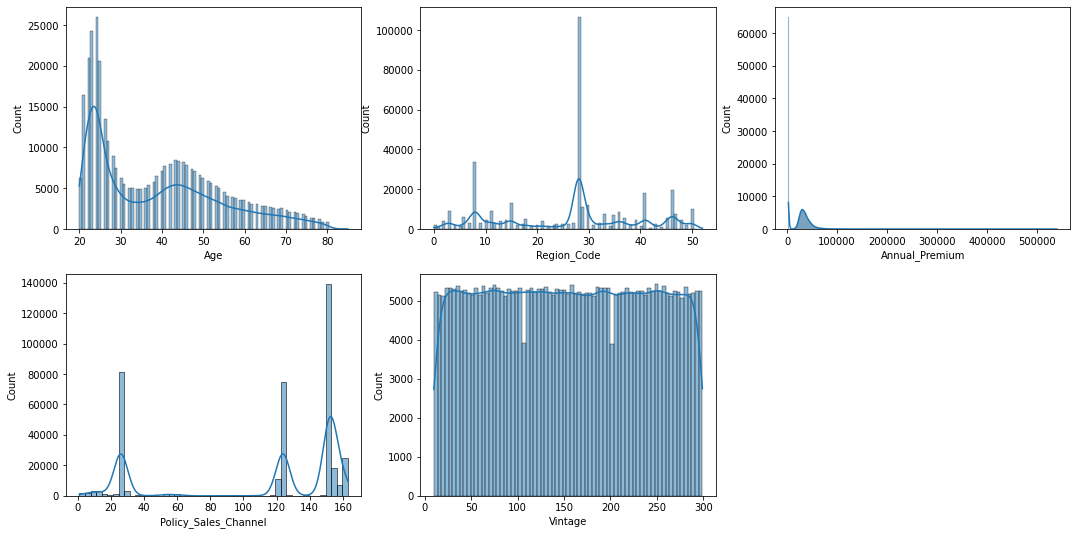

In [15]:
numerical_columns = ['Age','Region_Code','Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
j = 1
plt.figure(figsize=(18,9))
for column in numerical_columns:
    plt.subplot(2, 3, j)
    sns.histplot(df[column], kde=True);
    
    j += 1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

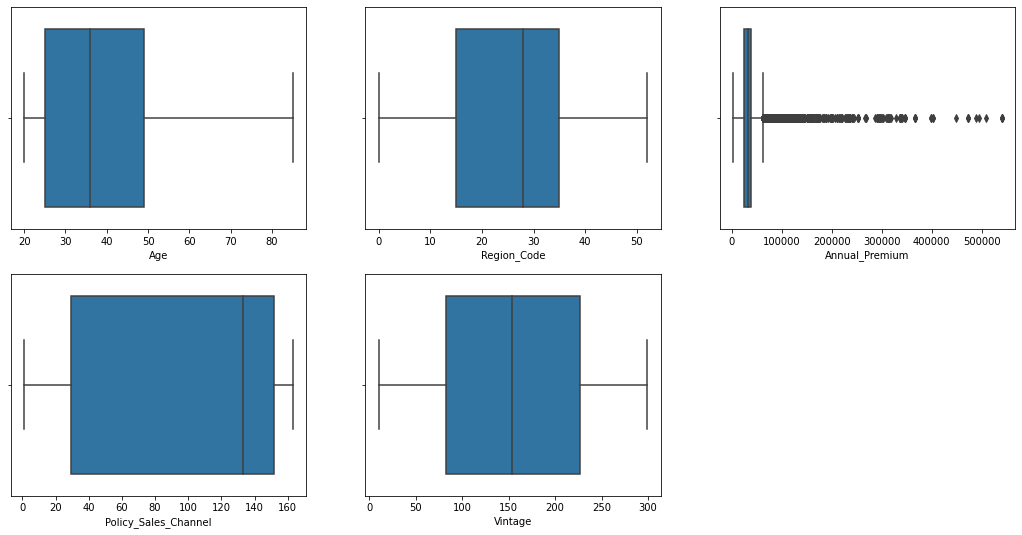

In [16]:
plt.figure(figsize = (18, 9))
j = 1 

for column in numerical_columns:
    plt.subplot(2,3, j)
    sns.boxplot(df[column])
    j+=1 


### **Gender**

We are intrested in customer response wrt to their gender

In [17]:
df['Gender'].value_counts()


Male      206089
Female    175020
Name: Gender, dtype: int64

In [18]:
pd.crosstab(index = df['Gender'], columns = df['Response'],normalize = 'index')*100


Response          0          1
Gender                        
Female    89.609759  10.390241
Male      86.158893  13.841107

### **Ho:  More than 60% of customers who are intrested in buying Vehicle insurance are men.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


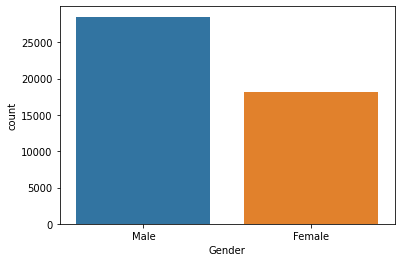

In [19]:

sns.countplot(df[df['Response']==1]['Gender'])
plt.show()

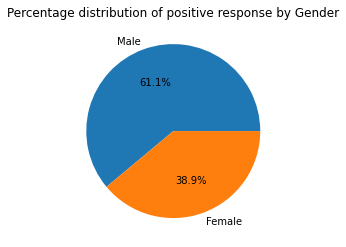

In [20]:
#percentage distribution of positive response by Gender
s=df[df['Response']==1]['Gender'].value_counts().reset_index()
plt.pie(s['Gender'],labels=['Male','Female'],autopct='%.1f%%')
plt.title("Percentage distribution of positive response by Gender")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


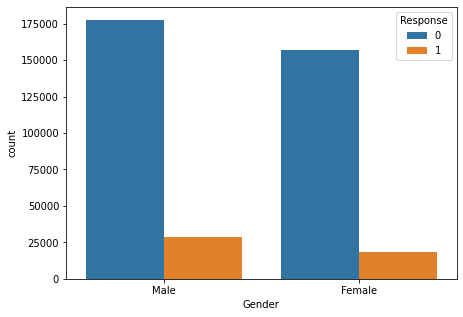

In [21]:
plt.figure(figsize = (7, 5))
ax =sns.countplot(df['Gender'], hue = df['Response'])
plt.show()

1. 61.1% customers intrested in buying insurance are Male and 38.9% are Female.
	
2. 89.6 % women, 86.1% men from the entire dataset are not intrested in buying insurance whereas, 	10.3 % women and 13.8% men are intrested in buying insurance.


## **AGE**

In [22]:
#Grouping age in different age groups
list=[]
for i in df['Age']:
  if 20<=i<30:
    i="Young"
  elif 30<=i<45:
    i="Middle"
  elif 45<=i<60:
    i="Old" 
  elif i>=60:
    i='Very old'
  list.append(i)
df['Age group']=list

In [23]:
pd.crosstab(index = df['Age group'], columns = df['Response'], normalize = 'columns').sort_values(1, ascending = False)*100


Response           0          1
Age group                      
Middle     22.329612  41.293085
Old        20.571533  35.076001
Young      44.506413  13.645900
Very old   12.592442   9.985014

### **Ho:  Majority Customers who are intrested in buying insurance are of middle age.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


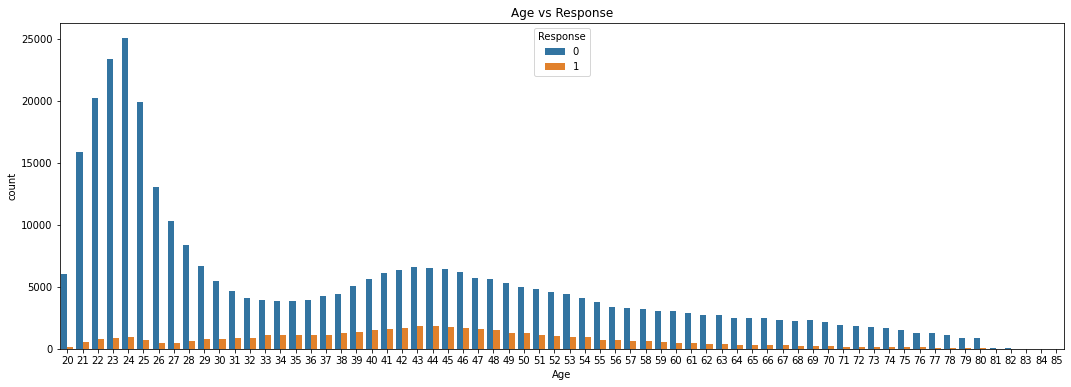

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


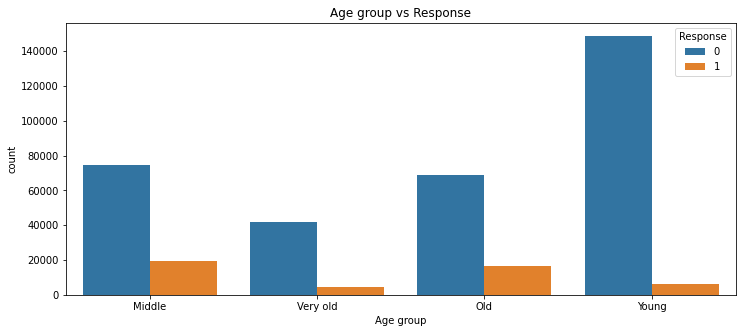

In [24]:
#Overall response distribution in all age group
plt.figure(figsize = (18, 6))
sns.countplot(df['Age'], hue = df['Response'])
plt.title('Age vs Response')
plt.show()

plt.figure(figsize = (12, 5))
sns.countplot(df['Age group'], hue = df['Response'])
plt.title('Age group vs Response')
plt.show()

People in middle age group(30-45) are most intrested in buying insurance, followed by people in old age group(45-60). Young people(20-30) seems least intrested in buying insurance.

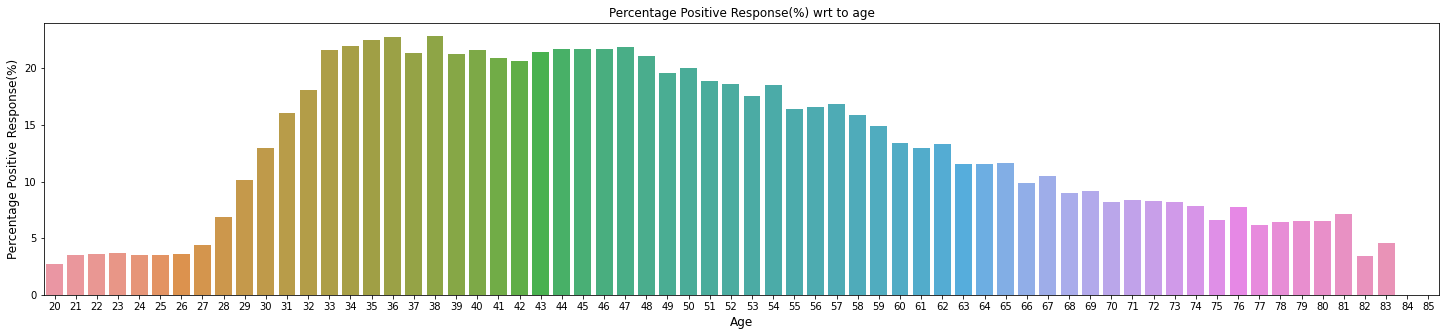

Maximum Percentage 23.0


In [25]:
# percentage positive response wrt to age
Yes= df[df['Response']==1].groupby(['Age'])['Response'].count()
Total = df.groupby(['Age'])['Response'].count()

s= ((Yes/Total)*100).reset_index()

fig, ax = plt.subplots(figsize = ( 25 , 5 ))
sns.barplot(ax=ax,data=s,x= 'Age',y='Response')
ax.set_xlabel( "Age" , size = 12 )

ax.set_ylabel( "Percentage Positive Response(%)" , size = 12 )
ax.set_title( "Percentage Positive Response(%) wrt to age" , size = 12 )
plt.show()
print(f'Maximum Percentage',round(s['Response'].max(),0))


Above plot show the positive response in percentage wrt to age. we can see maximum positive response is shown by people in age 33 to 50.

Maximum percentage of people in any age group intrested in buying insurance is 23%.

**DRIVING LICENSE**

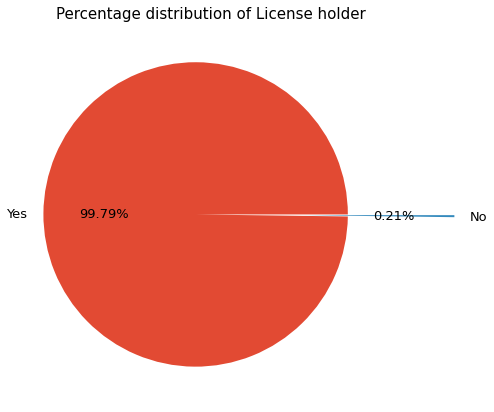

In [26]:
#Percentage distribution of License holder
a=df[df['Driving_License']==1]['Driving_License'].count()
b=df[df['Driving_License']==0]['Driving_License'].count()
fig = plt.figure(figsize = (11, 7))
plt.style.use('ggplot')
plt.pie((a,b),labels=['Yes','No'],autopct='%0.2f%%',radius=1,explode=[0.1,0.6],textprops={'fontsize': 13})
plt.title('Percentage distribution of License holder',size=15,loc='center')
plt.show()

In [27]:
alt=df[df['Driving_License']==0]
t=alt[alt['Response']==1]
t.shape

(41, 12)

We have only 41 entries where people not having driving license takes insurance.

In [28]:
p=pd.crosstab(index = df['Driving_License'], columns = df['Response'], normalize = 'index')*100
p

Response                 0          1
Driving_License                      
0                94.950739   5.049261
1                87.728276  12.271724

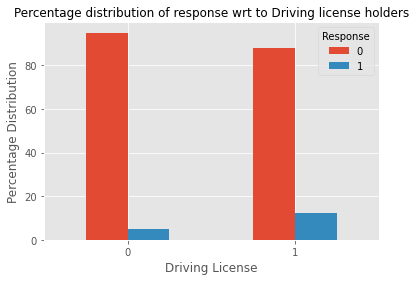

In [29]:
z=p.plot.bar(rot=0)
z.set_xlabel("Driving License")
z.set_ylabel("Percentage Distribution")
z.set_title( "Percentage distribution of response wrt to Driving license holders" , size = 12 )
plt.show()

There's negligible percentage of people who do not have driving licence but are intrested in buying insurance, rest all people who shows intrest in buying insurance do have driving license

## **Previously insuranced**

In [30]:
i=pd.crosstab(index = df['Previously_Insured'], columns = df['Response'], normalize = 'index')*100
i

Response                    0          1
Previously_Insured                      
0                   77.454584  22.545416
1                   99.909522   0.090478

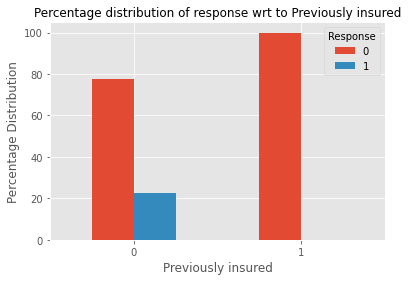

In [31]:
z=i.plot.bar(rot=0)
z.set_xlabel("Previously insured")
z.set_ylabel("Percentage Distribution")
z.set_title( "Percentage distribution of response wrt to Previously insured" , size = 12 )
plt.show()

Previously insured/Previous customers are very less likely to buy insurance. Whereas, around 22 percent people with no previous insurance are intrested in buying insurance.

## **Vehicle Age**

In [32]:
i=pd.crosstab(index = df['Vehicle_Age'], columns = df['Response'], normalize = 'columns')*100
i

Response             0          1
Vehicle_Age                      
1-2 Year     49.494765  74.515093
< 1 Year     47.124543  15.418540
> 2 Years     3.380692  10.066367

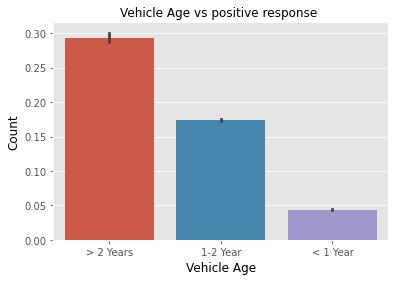

In [33]:
sns.barplot(x='Vehicle_Age',y='Response',data=df)
plt.xlabel('Vehicle Age',size=12,color='black')
plt.ylabel('Count',size=12,color='black')
plt.title('Vehicle Age vs positive response ',size=12,color='black')
plt.show()

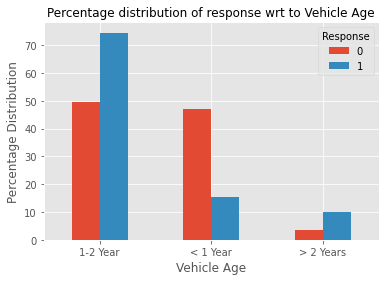

In [34]:
z=i.plot.bar(rot=0)
z.set_xlabel("Vehicle Age")
z.set_ylabel("Percentage Distribution")
z.set_title( "Percentage distribution of response wrt to Vehicle Age" , size = 12 )
plt.show()

1. People having vehicle age more of more than 2 years are most intrested in buying insurance , where as people with vehicle age between 1-2 years and less than 1 year are comparitively less intrested. 

## **Vehicle Damage**

In [35]:
i=pd.crosstab(index = df['Vehicle_Damage'], columns = df['Response'], normalize = 'index')*100

# Peeople who has a vehicle damage are more likely to response since they know the concequences
# People who don't have a vehicle Damage Are less likely to response 

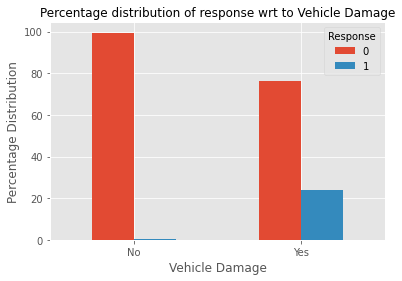

In [36]:
z=i.plot.bar(rot=0)
z.set_xlabel("Vehicle Damage")
z.set_ylabel("Percentage Distribution")
z.set_title( "Percentage distribution of response wrt to Vehicle Damage" , size = 12 )
plt.show()

 People who has vehicle damage are more like to response to Insurance.

### **Ho:   More than 40% of customers who have damaged vehicle are intrested in buying vehicle insurance.**

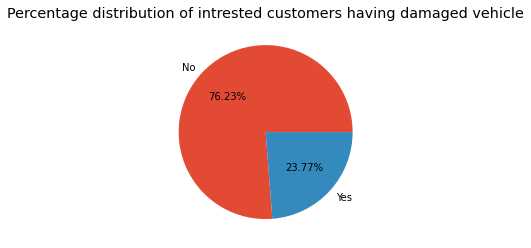

In [37]:
s=df[df['Vehicle_Damage']=='Yes']['Response'].value_counts().reset_index()
plt.pie(s['Response'],labels=['No','Yes'],autopct='%0.2f%%',radius=1)
plt.title("Percentage distribution of intrested customers having damaged vehicle")
plt.show()

Only 23.77% people who have damaged vehicle are intrested in buying vehicle insurance.

## **Annual Premium**

### **Ho:   More than 60% people will buy the least expensive premium insurance.**

In [38]:
#Least expensive premium plan
df['Annual_Premium'].min()

2630.0

In [39]:
k=df.groupby('Annual_Premium')['Response'].sum().sort_values( ascending = False).reset_index().head(30)

In [40]:
k.head(10)

Annual_Premium  Response
0          2630.0      8505
1         69856.0        38
2         45179.0        11
3         27930.0        10
4         32643.0         9
5         33436.0         9
6         28868.0         9
7         44392.0         9
8         25514.0         8
9         52453.0         8

In [41]:
#total positive response
a=df[df['Response']==1]
a1=a.shape
#people intrested in buying cheapest premium plan
a2=a[a['Annual_Premium']==2630.0].shape

#percentage people buying cheapest plan
print("Percentage people buying cheapest plan",round(a2[0]*100/a1[0],2))

Percentage people buying cheapest plan 18.21


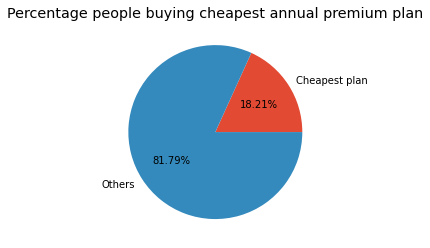

In [42]:
plt.pie(x=[a2[0],a1[0]-a2[0]],labels=['Cheapest plan','Others'],autopct='%0.2f%%',radius=1)
plt.title("Percentage people buying cheapest annual premium plan")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


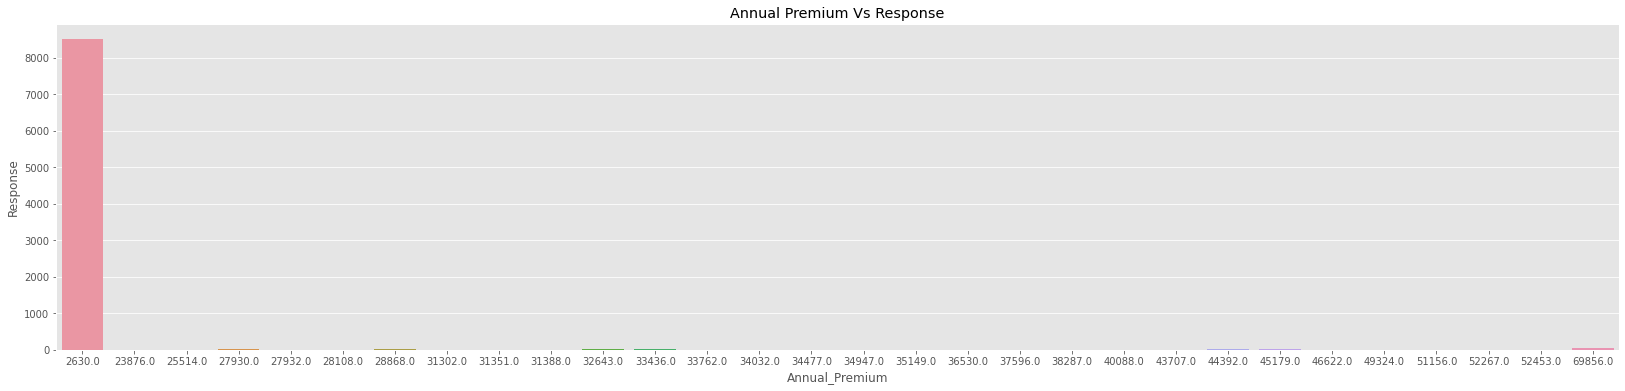

In [43]:
plt.figure(figsize=(28,6))
sns.barplot(k['Annual_Premium'],k['Response'])
plt.title('Annual Premium Vs Response')
plt.show()

From the above plot we can see only annual premium of 2630.0 has maximum positive response. 18.21% customers were intrested in buying insurance with this plan, followed by other premium charges which has response below 100.

So , we can conclude that annual premium of 2630.0 is the most popular among all the plans.

## **Region code**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


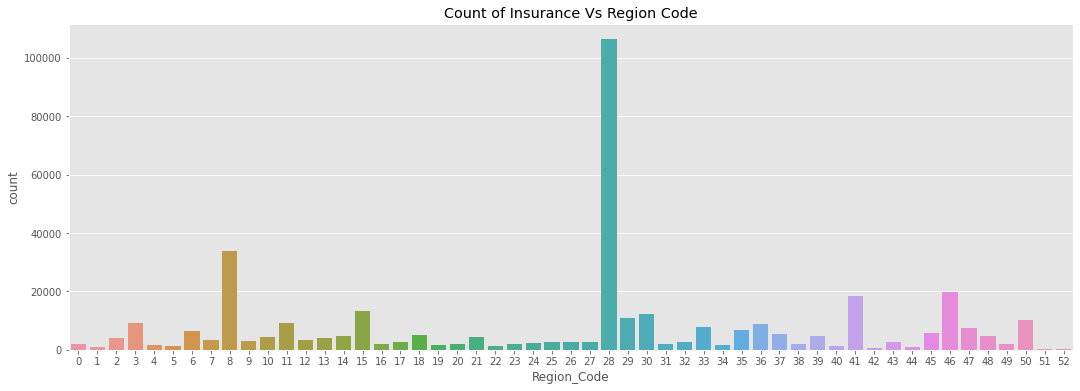

In [44]:
#studying the frequency , from which region the maximum insurances were sold
plt.figure(figsize=(18,6))
sns.countplot(df['Region_Code'].astype(int))
plt.title('Count of Insurance Vs Region Code')
plt.show()

Most customers are from region code 28, followed by region code 8,41,46 and 50.

## **Vintage**

### **Ho:  Customers who are longer associated with company will be more intrested in buying insurance.**

In [45]:
df['Vintage'].max()

299

In [46]:
#grouping customers from new to old based on no of days they have been associated with company
list1=[]
for i in df['Vintage']:
  if 0<=i<100:
    i="New"
  elif 100<=i<200:
    i="Middle"
  elif 200<=i<300:
    i="Old" 
  list1.append(i)
df['Customer type']=list1

Response               0          1
Customer type                      
Middle         87.731675  12.268325
New            87.755825  12.244175
Old            87.744702  12.255298


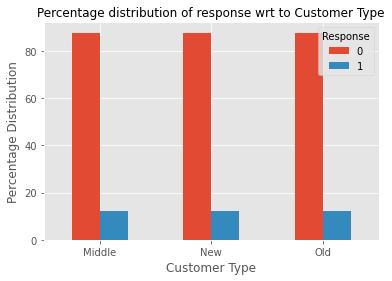

In [47]:
i=pd.crosstab(index = df['Customer type'], columns = df['Response'], normalize = 'index')*100
print(i)

z=i.plot.bar(rot=0)
z.set_xlabel("Customer Type")
z.set_ylabel("Percentage Distribution")
z.set_title( "Percentage distribution of response wrt to Customer Type" , size = 12 )
plt.show()

We have got an almost equal response from the customers and wheter they are newly associated with company or are old customers didn't have much effect on their response.

## **Checking Correlation between variables**

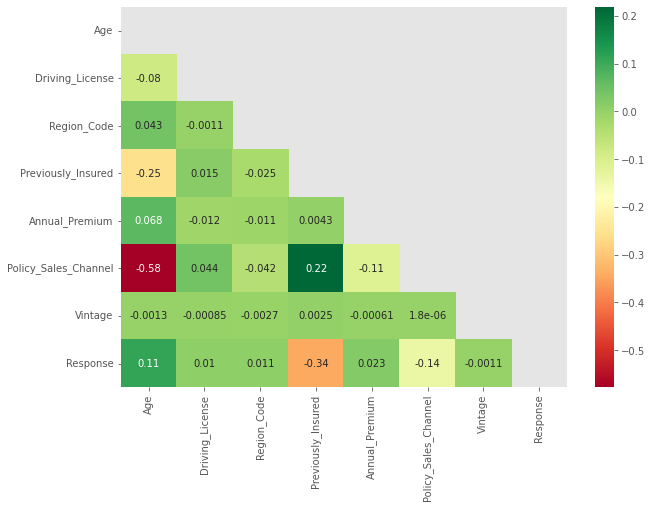

In [48]:
#ploting heatmap
plt.figure(figsize = (10, 7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),mask=mask,annot=True,cmap='RdYlGn')
plt.show()

After observing the heatmap we donot see multicolinearity, as no two variables are highly correlated with each each other.

The dependent variable(Response) is postively correlated with all other variables except previously insured variable.

# **Feature Engineering**

## **ONE HOT ENCODING OF CATEGORICAL FEATURES**

In [49]:
from sklearn.preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])


In [50]:
df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            2   
1       1   76                1          3.0                   0            0   
2       1   47                1         28.0                   0            2   
3       1   21                1         11.0                   1            1   
4       0   29                1         41.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0               1         40454.0                  26.0      217         1   
1               0         33536.0                  26.0      183         0   
2               1         38294.0                  26.0       27         1   
3               0         28619.0                 152.0      203         0   
4               0         27496.0                 152.0       39         0   

  Age group Customer type  
0    Middle           Old  
1  Very old        Middle  
2       Old           New  
3     Young           Old  
4     Young           New

### **Standardisation of data**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
 11  Age group             381109 non-null  object 
 12  Customer type         381109 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 37.8+ MB


# **Model Training**

In [52]:
df.head(1)

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            2   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0               1         40454.0                  26.0      217         1   

  Age group Customer type  
0    Middle           Old

In [53]:
#dropping some columns from the final dataset as they do not serve much importance to our model or a modeled format for that column is added to the dataset.
X = df.drop(columns = [ 'Driving_License','Response','Age group','Customer type'])
y = df['Response']

## **Handling Imbalance Dataset**

In [54]:
df['Response'].value_counts()


0    334399
1     46710
Name: Response, dtype: int64

In [55]:
print('Percentage response for Yes', round(46710/(334399+46710)*100,2))
print('Percentage response for No', round(334399/(334399+46710)*100,2))

Percentage response for Yes 12.26
Percentage response for No 87.74


This is an unbalanced dataset hence, we need to treat the data before using any ML alogrithm. Data imbalance can be treated by undersampling , oversampling or by synthetic oversampling(SMOTE) techniques.

In [56]:
#using SMOTE to treat data imbalance
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_sm, y_sm = smote.fit_resample(X, y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_sm))

Original dataset shape 381109
Resampled dataset shape 668798


### **Train test split and standardisation**

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, random_state = 0, test_size = 0.3)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sm=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
     


# **MACHINE LEARNING ALGORITHM**

**Some terminolgies to understand Machine Learning model evaluation parameters:**
<BR><BR><BR>

**1. True positive:** True Positives are the right predictions, predicting Positive samples for a actual positive samples. 

**2. False positive**: False Positives are the wrong predictions, predicting Positive samples for a actual Negative samples. Such failed prediction is called False Positive.

**3. True negative:** True negatives are the right predictions, predicting negative samples for a actual Negative samples. 

**4. False negative:** False negatives are the wrong predictions, predicting negative samples for a actual positive samples. 
<br><br><br>
**Precision:** Precision is a measure of how many of the positive predictions made are correct (true positives). 

                               True positive/(True positive+ False positive)

**Recall:** Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data

                               True positive/(True positive+ False negative)
**F-score:**  Is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.

                               2* Precision*Recall/(Precision + Recall)


**ROC-AUC:**  AUC-ROC is the valued metric used for evaluating the performance in classification models. The AUC-ROC metric clearly helps determine and tell us about the capability of a model in distinguishing the classes. The judging criteria being - Higher the AUC, better the model.                               

These metrics are best to judge the model performance.

##**Logistic Regression**

Logistic regression model takes a linear equation as input and use logistic function and log odds to perform a binary classification task. If the probability is greater than 50%, the prediction is positive class (1). Otherwise, the prediction is negative class (0).

In [58]:
#model training 

logreg = LogisticRegression()
logreg.fit(X_train_sm, y_train)
y_pred_log = logreg.predict(X_test)
logreg_probability =logreg.predict_proba(X_test)[:,1]

In [59]:
#studying model performance

acc_logreg = accuracy_score(y_test,y_pred_log)
recall_logreg = recall_score(y_test,y_pred_log)
prec_logreg = precision_score(y_test,y_pred_log)
f1_logreg = f1_score(y_test, y_pred_log)
AUC_LR= roc_auc_score(y_pred_log,y_test)

print("Accuracy : ", acc_logreg)
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7865430622009569
ROC_AUC Score: 0.8066634143354711


In [60]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76    100328
           1       0.73      0.91      0.81    100312

    accuracy                           0.79    200640
   macro avg       0.81      0.79      0.78    200640
weighted avg       0.81      0.79      0.78    200640



In [61]:
#confusion matrix

cm_logreg = confusion_matrix(y_test, y_pred_log, labels = [1,0])
df_logreg = pd.DataFrame(data = cm_logreg , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_logreg

Predicted 1  Predicted 0
Actual 1        91747         8565
Actual 0        34263        66065

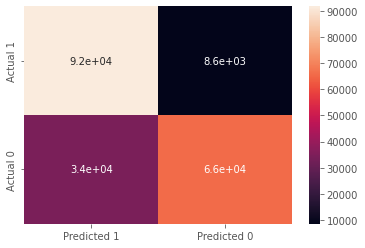

In [62]:
sns.heatmap(df_logreg, annot = True)

## Logistic Regression base model has  False Negative amount of 329

# Error Type Interpretation on This Dataset:
  # False Negative -- Actually Interested in Vehicle Insurance, However the model predicted that they're not interested
  # False Positive -- Actually not Interested in Vehicle Insurance, However the model predicted that they're interested 

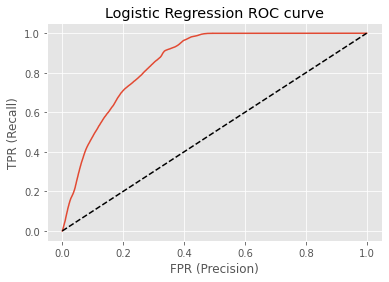

In [63]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, logreg_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## **KNN Classifier**

The KNN algorithm uses 'feature similarity' to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [64]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_sm, y_train)

y_pred_KNN = model_KNN.predict(X_test)
KNN_probability =model_KNN.predict_proba(X_test)[:,1]

In [65]:
#studying model performance

acc_KNN = accuracy_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
prec_KNN = precision_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN)
AUC_KNN= roc_auc_score(y_pred_KNN,y_test)

print("Accuracy : ", acc_KNN)
print("ROC_AUC Score:",AUC_KNN)

Accuracy :  0.8366427432216906
ROC_AUC Score: 0.8406672869938904


In [66]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83    100328
           1       0.80      0.89      0.85    100312

    accuracy                           0.84    200640
   macro avg       0.84      0.84      0.84    200640
weighted avg       0.84      0.84      0.84    200640



In [67]:
#plotting confusion matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN, labels = [1,0])

In [68]:
df_smote_KNN = pd.DataFrame(data = cm_KNN , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_smote_KNN

## KNN base model has  False Negative amount of 5174

# KNN model has more False Negative means this model doesn't perform well in this task 

Predicted 1  Predicted 0
Actual 1        89377        10935
Actual 0        21841        78487

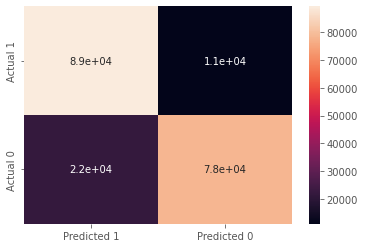

In [69]:
sns.heatmap(df_smote_KNN, annot = True)

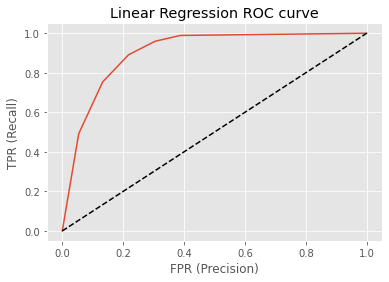

In [70]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, KNN_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

##**Decision Tree**

In a decision tree, the algorithm begins by considering all the available features (also called “attributes”) of the input data. It then selects the feature that best splits the data into different classes or categories. This process is repeated for each split, with the algorithm choosing the feature that best divides the data at each step. The process continues until the tree is fully grown, or until a stopping criterion is reached (such as a maximum tree depth or a minimum number of samples in a leaf node).

Once the decision tree is created, it can be used to make predictions on new input data by following the path down the tree based on the feature values of the input data.

In [71]:
#model training with hyperparameter tuning

modelDT = DecisionTreeClassifier()
modelDT.fit(X_train_sm, y_train)

y_pred_DT = modelDT.predict(X_test)
DT_probability =modelDT.predict_proba(X_test)[:,1]

In [72]:
acc_DT = accuracy_score(y_test,y_pred_DT)
prec_DT = precision_score(y_test, y_pred_DT)
rec_DT = recall_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)
AUC_DT= roc_auc_score(y_pred_DT,y_test)

print("Accuracy : ", acc_DT)
print("ROC_AUC Score:",AUC_DT)


Accuracy :  0.8763456937799043
ROC_AUC Score: 0.8765040342835914


In [73]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88    100328
           1       0.87      0.89      0.88    100312

    accuracy                           0.88    200640
   macro avg       0.88      0.88      0.88    200640
weighted avg       0.88      0.88      0.88    200640



In [74]:
cm_DT = confusion_matrix(y_test, y_pred_DT, labels = [1,0])
df_DT = pd.DataFrame(data = cm_DT , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_DT

Predicted 1  Predicted 0
Actual 1        88937        11375
Actual 0        13435        86893

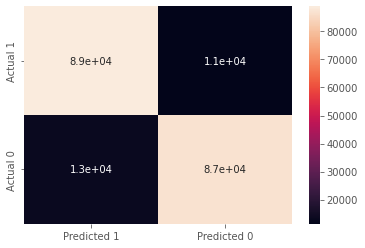

In [75]:
sns.heatmap(df_DT, annot = True)

## Decision Tree Classifier base model has  False Negative amount of 4005

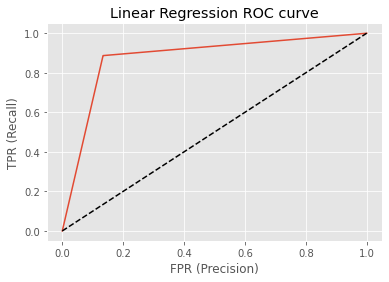

In [76]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, DT_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## **Random Forest Classifier**

In random forest classification algorithm consists of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [77]:
#model training
modelRF = RandomForestClassifier()
modelRF.fit(X_train_sm, y_train)
y_pred_RF = modelRF.predict(X_test)
RF_probability =modelRF.predict_proba(X_test)[:,1]

In [78]:
#studying model performance
acc_RF = accuracy_score(y_test,y_pred_RF)
prec_RF = precision_score(y_test, y_pred_RF)
rec_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)
AUC_RF= roc_auc_score(y_pred_RF,y_test)

print("Accuracy : ", acc_RF)
print("ROC_AUC Score:",AUC_RF)


Accuracy :  0.8867175039872408
ROC_AUC Score: 0.887314975275195


In [79]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88    100328
           1       0.87      0.91      0.89    100312

    accuracy                           0.89    200640
   macro avg       0.89      0.89      0.89    200640
weighted avg       0.89      0.89      0.89    200640



In [80]:
cm_RF = confusion_matrix(y_test, y_pred_RF, labels = [1,0])
df_RF = pd.DataFrame(data = cm_RF , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_RF

Predicted 1  Predicted 0
Actual 1        90919         9393
Actual 0        13336        86992

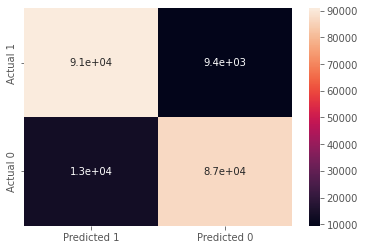

In [81]:
sns.heatmap(df_RF, annot = True)

## Random Forest Classifier base model has  False Negative amount of 3480

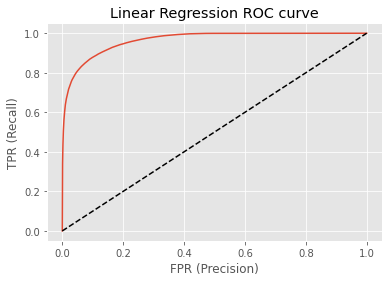

In [82]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## **XGB Classifier**

XGB classifier is a boosting technique of decisiion tree and this technique matches weak learners — learners that have poor predictive power and do slightly better than random guessing — to a specific weighted subset of the original dataset. Higher weights are given to subsets that were misclassified earlier.

GBM combines predictions from multiple decision trees, and all the weak learners are decision trees. The key idea with this algorithm is that every node of those trees takes a different subset of features to select the best split. As it’s a Boosting algorithm, each new tree learns from the errors made in the previous ones.

In [84]:
#training model 
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train_sm, y_train)
y_predict = XGB_fit.predict(X_test)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]


#Studying model performance
acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print('accuracy_score',accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

accuracy_score 0.8398923444976076
ROC_AUC Score: 0.852045836510793


In [85]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82    100328
           1       0.79      0.93      0.85    100312

    accuracy                           0.84    200640
   macro avg       0.85      0.84      0.84    200640
weighted avg       0.85      0.84      0.84    200640



In [86]:
cm_XG = confusion_matrix(y_test, y_predict, labels = [1,0])
df_XG = pd.DataFrame(data = cm_XG , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_XG

Predicted 1  Predicted 0
Actual 1        93571         6741
Actual 0        25383        74945

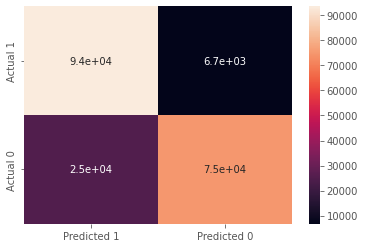

In [87]:
sns.heatmap(df_XG, annot = True)

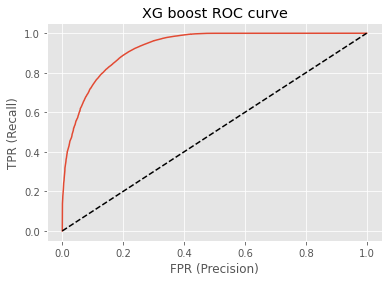

In [88]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XG boost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# **OBSERVATIONS**

In [89]:
eva_met = {
    "LogisticReg": [acc_logreg,prec_logreg,recall_logreg,f1_logreg,AUC_LR],
    "KNN": [acc_KNN, prec_KNN, recall_KNN, f1_KNN,AUC_KNN],
    "DecisionTree": [acc_DT, prec_DT, rec_DT, f1_DT,AUC_DT],
    "RandomForest" : [acc_RF, prec_RF, rec_RF, f1_RF,AUC_RF],
    "Xgboost" :[acc_xgb,precision_xgb,recall_xgb,f1score_xgb,AUC_xgb]
    }

eva = pd.DataFrame(data = eva_met, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score','ROC_AUC score'])
eva

# From this Evaluation MAtrix it shows that logistic Regression has the best Recall Score for the base model

LogisticReg       KNN  DecisionTree  RandomForest   Xgboost
Accuracy          0.786543  0.836643      0.876346      0.886718  0.839892
Precision         0.728093  0.803620      0.868763      0.872083  0.786615
Recall            0.914616  0.890990      0.886604      0.906362  0.932800
F1-Score          0.810765  0.845053      0.877593      0.888892  0.853493
ROC_AUC score     0.806663  0.840667      0.876504      0.887315  0.852046

We have got best accuracy score for Random forest model, but since this was a classification model for a highly imbalanced dataset accuracy will not be a good metric to judge the model performance. Considering the other metrics such as f1, recall and precision rates **Random forest has given the best results followed by Decision Tree model.**

# **Model Explainability**

In [91]:
# installing lime package
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import lime
from lime import lime_tabular


In [93]:
X.columns.values

array(['Gender', 'Age', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'], dtype=object)

In [94]:
lime_explainer = lime_tabular.LimeTabularExplainer(
    feature_names = X.columns.values,
    training_data = np.array(X_train_sm),
    mode = 'classification',
    verbose=True,
    random_state =42 )
lime_exp = lime_explainer.explain_instance(
    data_row = X_test[4],
    predict_fn = modelRF.predict_proba, 
)
lime_exp.show_in_notebook(show_table=True)

Intercept 0.08423137399906833
Prediction_local [0.75374504]
Right: 0.05


In [95]:
#random instance from decision tree model
lime_explainer = lime_tabular.LimeTabularExplainer(
    feature_names = X.columns.values,
    training_data = np.array(X_train_sm),
    mode = 'classification',
    verbose=True,
    random_state =42 )
lime_exp = lime_explainer.explain_instance(
    data_row = X_test[110],
    predict_fn = modelDT.predict_proba, 
)
lime_exp.show_in_notebook(show_table=True)

Intercept 0.9448442589344918
Prediction_local [-0.05954881]
Right: 0.0


# **CONCLUSION**

We have got best accuracy score for Random forest model, but since this was a classification model for a highly imbalanced dataset accuracy will not be a good metric to judge the model performance. Considering the other metrics such as f1, recall and precision rates **Random forest has given the best results followed by Decision Tree model.**





## **EDA insights:**

Percentage people who are intrested in buying insurance 12.25%


**GENDER**
1. 61.1% customers intrested in buying insurance are Male and 38.9% are Female.
	
2. 89.6 % women, 86.1% men from the entire dataset are not intrested in buying insurance whereas, 	10.3 % women and 13.8% men are intrested in buying insurance.
  

**AGE**  
1. People in middle age group(30-45) are most intrested in buying insurance, followed by people in old age group(45-60). Young people(20-30) seems least intrested in buying insurance.

2. Maximum percentage of people in any age group intrested in buying insurance is 23%.

**DRIVING LICENSE**

There's negligible percentage of people who do not have driving licence but are intrested in buying insurance, rest all people who shows intrest in buying insurance do have driving license.


**PREVIOUSLY INSURED**

Previously insured/Previous customers are very less likely to buy insurance. Whereas, around 22 percent people with no previous insurance are intrested in buying insurance.


**VEHICLE AGE AND VEHICLE DAMAGE**

1. People having vehicle age more of more than 2 years are most intrested in buying insurance , where as people with vehicle age between 1-2 years and less than 1 year are comparitively less intrested.

2. People who has vehicle damage are more likely to response to Insurance.

3. Only 23.77% people who have damaged vehicle are intrested in buying vehicle insurance.


**ANNUAL PREMIUM**

1.The cheapest annual premium is for 2630.0	and 18.21 percent people are intrested in taking this plan.

So , we can conclude that annual premium of 2630.0 is the most popular among all the plans.


**VINTAGE**

We have got an almost equal response from the customers and wheter they are newly associated with company or are old customers didn't have much effect on their response.